Question 1: What is Boosting in Machine Learning? Explain how it improves weak
learners.

Answer:- Boosting is an ensemble learning technique that combines multiple weak learners sequentially to create a strong predictive model.Each new model focuses on correcting the errors made by the previous models.

Boosting improves weak learners by:
- Assigning higher importance (weights) to misclassified samples
- Gradually reducing bias
- Learning complex patterns through iterative refinement

Popular boosting algorithms include AdaBoost, Gradient Boosting, XGBoost and CatBoost.

Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

Answer:
| Aspect    | AdaBoost | Gradient Boosting              |
| -------------------- | ------------------------------- | ------------------------------ |
| Training style       | Sequential                      | Sequential                     |
| Error handling       | Reweights misclassified samples | Fits models on residual errors |
| Loss function        | Exponential loss                | Any differentiable loss        |
| Flexibility          | Limited                         | Highly flexible                |
| Sensitivity to noise | High                            | Lower (with regularization)    |

Question 3: How does regularization help in XGBoost?

Answer: Regularization in XGBoost helps prevent overfitting by penalizing model complexity. It includes:

- L1 (alpha): Encourages sparsity in leaf weights
- L2 (lambda): Controls large weights
- Tree complexity control

This leads to better generalization and stable models.

Question 4: Why is CatBoost considered efficient for handling categorical data?

Answer: CatBoost efficiently handles categorical features by:

- Using target-based encoding
- Avoiding one-hot encoding
- Reducing target leakage through ordered boosting
- Handling missing values internally

This makes CatBoost fast, accurate and ideal for datasets with many categorical variables.

Question 5: What are some real-world applications where boosting techniques are
preferred over bagging methods?

Answer: Boosting is preferred in:

- Credit risk modeling
- Fraud detection
- Medical diagnosis
- Recommendation systems
- Customer churn prediction

These tasks require high accuracy and bias reduction, which boosting handles better than bagging.

Datasets:

● Use sklearn.datasets.load_breast_cancer() for classification tasks.

● Use sklearn.datasets.fetch_california_housing() for regression
tasks.

Question 6: Write a Python program to:

● Train an AdaBoost Classifier on the Breast Cancer dataset

● Print the model accuracy

(Include your Python code and output in the code box below.)

Answer:

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y =  load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
# fetch_california_housing()

Accuracy Score:  0.9415204678362573


Question 7: Write a Python program to:

● Train a Gradient Boosting Regressor on the California Housing dataset

● Evaluate performance using R-squared score

(Include your Python code and output in the code box below.)

Answer:

In [2]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=0.3)
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R2 Score: ", r2_score(y_test, y_pred))


R2 Score:  0.8349648302768071


Question 8: Write a Python program to:

● Train an XGBoost Classifier on the Breast Cancer dataset

● Tune the learning rate using GridSearchCV

● Print the best parameters and accuracy

(Include your Python code and output in the code box below.)

Answer:

In [3]:
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV

X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=0.3)

param_grid = {
    "learning_rate" : [0.01, 0.1, 0.2]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metrics='logloss')
grid = GridSearchCV(xgb, param_grid, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters: ", grid.best_params_)
print("Accuracy: ", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:50:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:50:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:50:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:50:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packa

Best Parameters:  {'learning_rate': 0.2}
Accuracy:  0.9532163742690059


Question 9: Write a Python program to:

● Train a CatBoost Classifier

● Plot the confusion matrix using seaborn

(Include your Python code and output in the code box below.)

Answer:

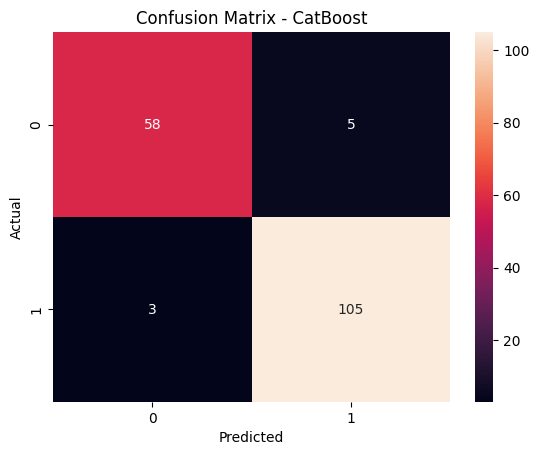

In [5]:
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - CatBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Question 10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.

Describe your step-by-step data science pipeline using boosting techniques:

● Data preprocessing & handling missing/categorical values

● Choice between AdaBoost, XGBoost, or CatBoost

● Hyperparameter tuning strategy

● Evaluation metrics you'd choose and why

● How the business would benefit from your model

Answer:
1. Data Preprocessing

- Handle missing values using:

    Median (numeric)

    Mode / CatBoost internal handling (categorical)

- Detect and treat outliers

- Address class imbalance using class weights or SMOTE

2. Handling Categorical Variables

- Prefer CatBoost (native categorical handling)

- Or use XGBoost with target encoding

3. Model Choice

- CatBoost → Best for mixed data

- XGBoost → High performance and flexibility

- Avoid AdaBoost due to sensitivity to noise

4. Hyperparameter Tuning

- GridSearchCV / RandomizedSearchCV

- Tune:

    learning_rate

    max_depth

    n_estimators

    subsample

5. Evaluation Metrics

- ROC-AUC (imbalanced data)

- Precision-Recall

- F1-Score

6. Business Value

- Reduced loan defaults

- Improved credit risk decisions

- Lower financial losses

- Automated and scalable decision system
